In [156]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
import seaborn as sns

In [143]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [8]:
weather_2009 = pd.read_excel('weather.xlsx',sheet_name = 0)
weather_2010 = pd.read_excel('weather.xlsx',sheet_name = 1)
weather_2011 = pd.read_excel('weather.xlsx',sheet_name = 2)
weather_2012 = pd.read_excel('weather.xlsx',sheet_name = 3)
weather_2013 = pd.read_excel('weather.xlsx',sheet_name = 4)
weather_2014 = pd.read_excel('weather.xlsx',sheet_name = 5)
weather_2015 = pd.read_excel('weather.xlsx',sheet_name = 6)
#weather_2016 = pd.read_excel('weather.xlsx',sheet_name = 7)
micro=pd.read_excel("macro_economic.xlsx")

In [9]:
train.shape, test.shape, weather_2009.shape, weather_2010.shape, weather_2011.shape, weather_2012.shape, weather_2013.shape, weather_2014.shape , weather_2015.shape, micro.shape #, weather_2016.shape

((216, 4),
 (36, 4),
 (365, 23),
 (365, 23),
 (365, 23),
 (366, 23),
 (365, 23),
 (365, 23),
 (365, 23),
 (96, 18))

In [144]:
train.head(10)

,Year,Month,ProductCategory,Sales
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0
5,2009,2,OtherClothing,859.0
6,2009,3,WomenClothing,2256.0
7,2009,3,MenClothing,542.0
8,2009,3,OtherClothing,921.0
9,2009,4,WomenClothing,2662.0


In [10]:
train.isnull().sum()

Year               0
Month              0
ProductCategory    0
Sales              0
dtype: int64

In [147]:
year_pc=train.groupby(['Year','ProductCategory']).Sales.transform('median')
#year_pc

In [148]:
train.Sales.fillna(year_pc, inplace=True)
train.isnull().sum()

Year               0
Month              0
ProductCategory    0
Sales              0
dtype: int64

In [149]:
test.Sales.fillna(year_pc, inplace=True)
test.isnull().sum()

Year               0
Month              0
ProductCategory    0
Sales              0
dtype: int64

In [14]:
train_feature = train.drop(labels = "Sales", axis = 1)
test_feature = test.drop(labels = "Sales", axis = 1)

In [15]:
data1 = pd.concat((weather_2009, weather_2010), axis =0)
data2 = pd.concat((data1, weather_2011), axis =0)
data3 = pd.concat((data2, weather_2012), axis =0)
data4 = pd.concat((data3, weather_2013), axis =0)
data = pd.concat((data4, weather_2014), axis =0)
#X_Test = pd.concat((weather_2015, weather_2016), axis =0)

In [16]:
data.shape

(2191, 23)

In [17]:
data.isnull().sum()

Year                              0
Month                             0
Day                               0
Temp high (°C)                    0
Temp avg (°C)                     0
Temp low (°C)                     0
Dew Point high (°C)               0
Dew Point avg (°C)                0
Dew Point low (°C)                0
Humidity (%) high                 0
Humidity (%) avg                  0
Humidity (%) low                  0
Sea Level Press. (hPa) high       0
Sea Level Press. (hPa) avg        0
Sea Level Press. (hPa) low        0
Visibility (km) high              0
Visibility (km) avg               0
Visibility (km) low               0
Wind (km/h) low                   0
Wind (km/h) avg                   0
Wind (km/h) high                  0
Precip. (mm) sum                  0
WeatherEvent                   1412
dtype: int64

In [18]:
data.Month.replace(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',]
                   ,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
weather_2015.Month.replace(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',]
                   ,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

In [19]:
normal = "Normal"
data.WeatherEvent.fillna(normal, inplace = True)
weather_2015.WeatherEvent.fillna(normal, inplace = True)

In [20]:
#labels=LabelEncoder()
data.WeatherEvent.replace(["Fog", "Fog , Rain", "Fog , Rain , Snow", "Fog , Snow", "Normal", "Rain", "Rain , Snow", "Snow", "Thunderstorm"   ]
                   ,[1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)

weather_2015.WeatherEvent.replace(["Fog", "Fog , Rain", "Fog , Rain , Snow", "Fog , Snow", "Normal", "Rain", "Rain , Snow", "Snow", "Thunderstorm"   ]
                   ,[1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)

In [21]:
train_feature.ProductCategory.replace(["MenClothing", "OtherClothing", "WomenClothing"],[1, 2, 3], inplace=True)
test_feature.ProductCategory.replace(["MenClothing", "OtherClothing", "WomenClothing"],[1, 2, 3], inplace=True)

In [22]:
#data.isnull().sum()

In [23]:
for i in list(range(22)):
    data.iloc[:,i]=pd.to_numeric(data.iloc[:,i], errors='coerce')

In [24]:
data.dtypes

Year                             int64
Month                            int64
Day                              int64
Temp high (°C)                 float64
Temp avg (°C)                  float64
Temp low (°C)                  float64
Dew Point high (°C)            float64
Dew Point avg (°C)             float64
Dew Point low (°C)             float64
Humidity (%) high              float64
Humidity (%) avg               float64
Humidity (%) low               float64
Sea Level Press. (hPa) high    float64
Sea Level Press. (hPa) avg     float64
Sea Level Press. (hPa) low     float64
Visibility (km) high           float64
Visibility (km) avg            float64
Visibility (km) low            float64
Wind (km/h) low                float64
Wind (km/h) avg                float64
Wind (km/h) high               float64
Precip. (mm) sum               float64
WeatherEvent                     int64
dtype: object

In [25]:
data = data.drop(labels = 'Day', axis = 1)

In [26]:
data_group=data.groupby(['Year','Month']).transform('median')

In [27]:
##assigning month and year feature to month median df
mt=data.iloc[:,1]
yr=data.iloc[:,0]
data_group = data_group.assign(Month=mt.values)
data_group = data_group.assign(Year=yr.values)
data_group.head()

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,...,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,Year
0,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,...,16.0,16.0,16.0,26.0,11.0,39.0,0.0,5.0,1,2009
1,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,...,16.0,16.0,16.0,26.0,11.0,39.0,0.0,5.0,1,2009
2,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,...,16.0,16.0,16.0,26.0,11.0,39.0,0.0,5.0,1,2009
3,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,...,16.0,16.0,16.0,26.0,11.0,39.0,0.0,5.0,1,2009
4,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,...,16.0,16.0,16.0,26.0,11.0,39.0,0.0,5.0,1,2009


In [28]:
data_group.shape

(2191, 22)

In [29]:
drop_df=data_group.drop_duplicates(subset=None, keep='first', inplace=False)
drop_df.head()

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,...,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,Year
0,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,...,16.0,16.0,16.0,26.0,11.0,39.0,0.0,5.0,1,2009
31,7.0,3.0,-2.0,-2.5,-6.5,-12.0,65.0,50.0,37.0,1023.0,...,16.0,16.0,16.0,26.5,12.0,40.0,0.0,5.0,2,2009
59,11.0,7.0,3.0,1.0,-1.0,-6.0,70.0,56.0,39.0,1026.0,...,16.0,16.0,14.0,27.0,12.0,39.0,0.0,5.0,3,2009
90,15.5,11.5,7.0,7.5,2.5,-2.0,72.0,54.5,31.0,1021.5,...,16.0,16.0,16.0,26.5,10.5,39.0,0.0,5.0,4,2009
120,21.0,17.0,12.0,14.0,11.0,7.0,93.0,69.0,46.0,1021.0,...,16.0,15.0,11.0,23.0,8.0,32.0,0.0,5.0,5,2009


In [30]:
drop_df1=drop_df.append(drop_df)
drop_df1.shape

(144, 22)

In [31]:
final_df=drop_df1.append(drop_df)
final_df.shape

(216, 22)

In [32]:
##sorting the final_df
final=final_df.sort_values(['Year','Month'], ascending=True)
final.head()

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,...,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,Year
0,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,...,16.0,16.0,16.0,26.0,11.0,39.0,0.0,5.0,1,2009
0,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,...,16.0,16.0,16.0,26.0,11.0,39.0,0.0,5.0,1,2009
0,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,...,16.0,16.0,16.0,26.0,11.0,39.0,0.0,5.0,1,2009
31,7.0,3.0,-2.0,-2.5,-6.5,-12.0,65.0,50.0,37.0,1023.0,...,16.0,16.0,16.0,26.5,12.0,40.0,0.0,5.0,2,2009
31,7.0,3.0,-2.0,-2.5,-6.5,-12.0,65.0,50.0,37.0,1023.0,...,16.0,16.0,16.0,26.5,12.0,40.0,0.0,5.0,2,2009


In [33]:
final.shape

(216, 22)

In [34]:
cat = train_feature.iloc[:,2]
final= final.assign(ProductCategory = cat.values)

In [35]:
final.head()

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,...,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,Year,ProductCategory
0,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,...,16.0,16.0,26.0,11.0,39.0,0.0,5.0,1,2009,3
0,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,...,16.0,16.0,26.0,11.0,39.0,0.0,5.0,1,2009,1
0,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,...,16.0,16.0,26.0,11.0,39.0,0.0,5.0,1,2009,2
31,7.0,3.0,-2.0,-2.5,-6.5,-12.0,65.0,50.0,37.0,1023.0,...,16.0,16.0,26.5,12.0,40.0,0.0,5.0,2,2009,3
31,7.0,3.0,-2.0,-2.5,-6.5,-12.0,65.0,50.0,37.0,1023.0,...,16.0,16.0,26.5,12.0,40.0,0.0,5.0,2,2009,1


In [36]:
final= final.drop(labels = "Year", axis =1)

In [37]:
final.shape

(216, 22)

In [38]:
weather_2015.isnull().sum()

Year                           0
Month                          0
Day                            0
Temp high (°C)                 0
Temp avg (°C)                  0
Temp low (°C)                  0
Dew Point high (°C)            0
Dew Point avg (°C)             0
Dew Point low (°C)             0
Humidity (%) high              0
Humidity (%) avg               0
Humidity (%) low               0
Sea Level Press. (hPa) high    0
Sea Level Press. (hPa) avg     0
Sea Level Press. (hPa) low     0
Visibility (km) high           0
Visibility (km) avg            0
Visibility (km) low            0
Wind (km/h) low                0
Wind (km/h) avg                0
Wind (km/h) high               0
Precip. (mm) sum               0
WeatherEvent                   0
dtype: int64

In [39]:
weather_2015.head()

,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,...,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2015,1,1,4,1,-3,-8,-12,-14,46,...,1018,1015,16,16,16,27,11,50,0,5
1,2015,1,2,6,4,2,-7,-8,-9,52,...,1023,1016,16,16,16,24,11,40,0,5
2,2015,1,3,6,3,1,4,-2,-9,92,...,1030,1019,16,7,1,19,10,29,18.03,7
3,2015,1,4,13,9,5,10,6,-3,93,...,1012,1004,16,9,1,47,10,74,7.62,6
4,2015,1,5,9,2,-6,-3,-12,-19,49,...,1020,1009,16,16,16,39,17,61,0,5


In [40]:
for i in list(range(22)):
    weather_2015.iloc[:,i]=pd.to_numeric(weather_2015.iloc[:,i], errors='coerce')

In [41]:
weather_2015 = weather_2015.drop(labels = 'Day', axis = 1)

In [42]:
weather_2015_group=weather_2015.groupby(['Year','Month']).transform('median')

In [43]:
mt=weather_2015.iloc[:,1]
yr=weather_2015.iloc[:,0]
weather_2015_group = weather_2015_group.assign(Month=mt.values)
weather_2015_group = weather_2015_group.assign(Year=yr.values)
weather_2015_group.head()

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,...,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,Year
0,3.0,-1.0,-6.0,-7.0,-11.0,-16.0,69.0,52.0,35.0,1025.0,...,16.0,16.0,14.0,26.0,10.0,40.0,0.0,5,1,2015
1,3.0,-1.0,-6.0,-7.0,-11.0,-16.0,69.0,52.0,35.0,1025.0,...,16.0,16.0,14.0,26.0,10.0,40.0,0.0,5,1,2015
2,3.0,-1.0,-6.0,-7.0,-11.0,-16.0,69.0,52.0,35.0,1025.0,...,16.0,16.0,14.0,26.0,10.0,40.0,0.0,5,1,2015
3,3.0,-1.0,-6.0,-7.0,-11.0,-16.0,69.0,52.0,35.0,1025.0,...,16.0,16.0,14.0,26.0,10.0,40.0,0.0,5,1,2015
4,3.0,-1.0,-6.0,-7.0,-11.0,-16.0,69.0,52.0,35.0,1025.0,...,16.0,16.0,14.0,26.0,10.0,40.0,0.0,5,1,2015


In [44]:
drop_df_1=weather_2015_group.drop_duplicates(subset=None, keep='first', inplace=False)
drop_df_1.shape

(12, 22)

In [45]:
drop_df_2=drop_df_1.append(drop_df_1)
drop_df_2.shape

(24, 22)

In [46]:
drop_df_3=drop_df_2.append(drop_df_1)
drop_df_3.shape

(36, 22)

In [47]:
final_test=drop_df_3.sort_values(['Year','Month'], ascending=True)
final_test.head()

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,...,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,Year
0,3.0,-1.0,-6.0,-7.0,-11.0,-16.0,69.0,52.0,35.0,1025.0,...,16.0,16.0,14.0,26.0,10.0,40.0,0.0,5,1,2015
0,3.0,-1.0,-6.0,-7.0,-11.0,-16.0,69.0,52.0,35.0,1025.0,...,16.0,16.0,14.0,26.0,10.0,40.0,0.0,5,1,2015
0,3.0,-1.0,-6.0,-7.0,-11.0,-16.0,69.0,52.0,35.0,1025.0,...,16.0,16.0,14.0,26.0,10.0,40.0,0.0,5,1,2015
31,0.0,-4.0,-9.5,-6.5,-12.0,-19.0,68.0,54.5,34.0,1021.5,...,16.0,15.0,9.5,27.0,11.0,42.0,0.0,5,2,2015
31,0.0,-4.0,-9.5,-6.5,-12.0,-19.0,68.0,54.5,34.0,1021.5,...,16.0,15.0,9.5,27.0,11.0,42.0,0.0,5,2,2015


In [48]:
cat1 = test_feature.iloc[:,2]
final_test= final_test.assign(ProductCategory = cat1.values)
final_test= final_test.drop(labels = "Year", axis =1)

In [49]:
final_test.head()

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,...,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,ProductCategory
0,3.0,-1.0,-6.0,-7.0,-11.0,-16.0,69.0,52.0,35.0,1025.0,...,16.0,16.0,14.0,26.0,10.0,40.0,0.0,5,1,3
0,3.0,-1.0,-6.0,-7.0,-11.0,-16.0,69.0,52.0,35.0,1025.0,...,16.0,16.0,14.0,26.0,10.0,40.0,0.0,5,1,1
0,3.0,-1.0,-6.0,-7.0,-11.0,-16.0,69.0,52.0,35.0,1025.0,...,16.0,16.0,14.0,26.0,10.0,40.0,0.0,5,1,2
31,0.0,-4.0,-9.5,-6.5,-12.0,-19.0,68.0,54.5,34.0,1021.5,...,16.0,15.0,9.5,27.0,11.0,42.0,0.0,5,2,3
31,0.0,-4.0,-9.5,-6.5,-12.0,-19.0,68.0,54.5,34.0,1021.5,...,16.0,15.0,9.5,27.0,11.0,42.0,0.0,5,2,1


In [50]:
standardizedData_train = StandardScaler().fit_transform(final)
X_Train = standardizedData_train
Y_Train = train.Sales

C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [51]:
standardizedData_test = StandardScaler().fit_transform(final_test)
X_Test = standardizedData_test

C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [52]:
X_Train.shape, Y_Train.shape, X_Test.shape

((216, 22), (216,), (36, 22))

In [53]:
DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit (X_Train, Y_Train)
Y_pred = DTR.predict(X_Test)

In [54]:
sub = pd.DataFrame(pd.read_csv("sample_submission.csv")['S.No.'])
sub['Sales'] = Y_pred
sub.to_csv("sample_submission_day2_weather_5.csv", index = False)
sub.head()

,S.No.,Sales
0,1,2961.0
1,2,524.0
2,3,869.0
3,4,2872.0
4,5,524.0


# macro_economic

In [55]:
micro=pd.read_excel("macro_economic.xlsx")

In [56]:
#micro.isnull().sum()

In [57]:
micro1= micro.apply(lambda x: x["Year-Month"].split("-"), axis=1)
#micro1

In [58]:
#appending the year to a
a=[]
for i in range(96):    
    a.append(micro1[i][0])

In [59]:
#appending the month to b
b=[]
for i in range(96):    
    b.append(micro1[i][1])

In [60]:
#assigning the year feature to micro dataframe
micro["Year"]=a

In [61]:
micro["Month"]=b

In [62]:
#droping the year-month col
micro= micro.drop(labels = "Year-Month", axis = 1)

In [63]:
micro.Month.replace([' Jan', ' Feb', ' Mar', ' Apr', ' May', ' Jun', ' Jul', ' Aug', ' Sep', ' Oct', ' Nov', ' Dec',]
                   ,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

In [64]:
for i in list (range (19)):
    micro.iloc[:,i]=pd.to_numeric(micro.iloc[:,i], errors='coerce')

In [65]:
micro= micro.drop(labels = "PartyInPower", axis = 1)

In [66]:
micro= micro.drop(labels = "AdvertisingExpenses (in Thousand Dollars)", axis = 1)

In [67]:
train_micro=micro.iloc[:72]
train_micro.head()

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month
0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,2009,1
1,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2009,2
2,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650,2009,3
3,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225,2009,4
4,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300,2009,5


In [68]:
train_micro.shape

(72, 17)

In [69]:
train_micro1=train_micro.append(train_micro)
train_micro1.shape

(144, 17)

In [70]:
final_micro_train=train_micro1.append(train_micro)
final_micro_train = final_micro_train.sort_values(['Year','Month'], ascending=True)

In [71]:
final_micro_train = final_micro_train.drop(labels = "Year", axis =1)
final_micro_train.head(20)

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Month
0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,1
0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,1
0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,1
1,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2
1,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2
1,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2
2,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650,3
2,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650,3
2,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650,3
3,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225,4


In [72]:
test_micro=micro.iloc[72:84]
test_micro.head()

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month
72,17792.116953,16319.786314,258.376,5.7,11.99,10.47,24.88,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45,2015,1
73,17931.046190,16400.926737,259.240,5.5,11.98,9.85,25.05,69.84,3.70,10.845,9.518,781,15.496,3.625,10.20,2015,2
74,17900.981857,16329.523792,259.647,5.4,11.98,9.85,25.04,69.35,-0.70,10.845,9.518,781,15.496,3.625,10.25,2015,3
75,18015.748120,16427.136671,259.959,5.4,11.98,9.85,24.94,71.70,3.39,10.845,9.518,794,15.735,3.625,10.25,2015,4
76,18075.281412,16434.482376,261.066,5.5,12.04,9.69,24.88,72.86,1.62,10.845,9.157,826,15.753,3.625,10.30,2015,5


In [73]:
test_micro.shape

(12, 17)

In [74]:
test_micro1=test_micro.append(test_micro)
test_micro1.shape

(24, 17)

In [75]:
final_micro_test = test_micro1.append(test_micro)
final_micro_test = final_micro_test.sort_values(['Year','Month'], ascending=True)

In [76]:
final_micro_test = final_micro_test.drop(labels = "Year", axis =1)
final_micro_test.head()

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Month
72,17792.116953,16319.786314,258.376,5.7,11.99,10.47,24.88,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45,1
72,17792.116953,16319.786314,258.376,5.7,11.99,10.47,24.88,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45,1
72,17792.116953,16319.786314,258.376,5.7,11.99,10.47,24.88,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45,1
73,17931.046190,16400.926737,259.240,5.5,11.98,9.85,25.05,69.84,3.70,10.845,9.518,781,15.496,3.625,10.20,2
73,17931.046190,16400.926737,259.240,5.5,11.98,9.85,25.05,69.84,3.70,10.845,9.518,781,15.496,3.625,10.20,2


In [77]:
final.shape, final_test.shape, final_micro_train.shape, final_micro_test.shape

((216, 22), (36, 22), (216, 16), (36, 16))

In [78]:
names = [final, final_test, final_micro_train, final_micro_test]
for i in names:
    i.index = i['Month']
    print(i.shape)

(216, 22)
(36, 22)
(216, 16)
(36, 16)


In [150]:
final.head()

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,...,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,ProductCategory
Month,,,,,,,,,,,,,,,,,,,,,
1,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,...,16.0,16.0,16.0,26.0,11.0,39.0,0.0,5.0,1,3
1,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,...,16.0,16.0,16.0,26.0,11.0,39.0,0.0,5.0,1,1
1,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,...,16.0,16.0,16.0,26.0,11.0,39.0,0.0,5.0,1,2
2,7.0,3.0,-2.0,-2.5,-6.5,-12.0,65.0,50.0,37.0,1023.0,...,16.0,16.0,16.0,26.5,12.0,40.0,0.0,5.0,2,3
2,7.0,3.0,-2.0,-2.5,-6.5,-12.0,65.0,50.0,37.0,1023.0,...,16.0,16.0,16.0,26.5,12.0,40.0,0.0,5.0,2,1


In [151]:
final_test.head()

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,...,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,ProductCategory
Month,,,,,,,,,,,,,,,,,,,,,
1,3.0,-1.0,-6.0,-7.0,-11.0,-16.0,69.0,52.0,35.0,1025.0,...,16.0,16.0,14.0,26.0,10.0,40.0,0.0,5,1,3
1,3.0,-1.0,-6.0,-7.0,-11.0,-16.0,69.0,52.0,35.0,1025.0,...,16.0,16.0,14.0,26.0,10.0,40.0,0.0,5,1,1
1,3.0,-1.0,-6.0,-7.0,-11.0,-16.0,69.0,52.0,35.0,1025.0,...,16.0,16.0,14.0,26.0,10.0,40.0,0.0,5,1,2
2,0.0,-4.0,-9.5,-6.5,-12.0,-19.0,68.0,54.5,34.0,1021.5,...,16.0,15.0,9.5,27.0,11.0,42.0,0.0,5,2,3
2,0.0,-4.0,-9.5,-6.5,-12.0,-19.0,68.0,54.5,34.0,1021.5,...,16.0,15.0,9.5,27.0,11.0,42.0,0.0,5,2,1


In [152]:
final_micro_train.head()

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Month
Month,,,,,,,,,,,,,,,,
1,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55,1
1,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55,1
1,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55,1
2,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.10,2
2,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.10,2


In [153]:
final_micro_test.head()

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Month
Month,,,,,,,,,,,,,,,,
1,17792.116953,16319.786314,258.376,5.7,11.99,10.47,24.88,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45,1
1,17792.116953,16319.786314,258.376,5.7,11.99,10.47,24.88,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45,1
1,17792.116953,16319.786314,258.376,5.7,11.99,10.47,24.88,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45,1
2,17931.046190,16400.926737,259.240,5.5,11.98,9.85,25.05,69.84,3.70,10.845,9.518,781,15.496,3.625,10.20,2
2,17931.046190,16400.926737,259.240,5.5,11.98,9.85,25.05,69.84,3.70,10.845,9.518,781,15.496,3.625,10.20,2


In [83]:
train_final=pd.concat([final,final_micro_train],axis=1)
train_final.head()

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,...,Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Month
Month,,,,,,,,,,,,,,,,,,,,,
1,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,...,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55,1
1,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,...,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55,1
1,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,...,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55,1
2,7.0,3.0,-2.0,-2.5,-6.5,-12.0,65.0,50.0,37.0,1023.0,...,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.10,2
2,7.0,3.0,-2.0,-2.5,-6.5,-12.0,65.0,50.0,37.0,1023.0,...,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.10,2


In [121]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 1 to 12
Data columns (total 38 columns):
Temp high (°C)                                                       216 non-null float64
Temp avg (°C)                                                        216 non-null float64
Temp low (°C)                                                        216 non-null float64
Dew Point high (°C)                                                  216 non-null float64
Dew Point avg (°C)                                                   216 non-null float64
Dew Point low (°C)                                                   216 non-null float64
Humidity (%) high                                                    216 non-null float64
Humidity (%) avg                                                     216 non-null float64
Humidity (%) low                                                     216 non-null float64
Sea Level Press. (hPa) high                                          216 non-null floa

In [84]:
train_final.shape

(216, 38)

In [85]:
test_final=pd.concat([final_test,final_micro_test],axis=1)
test_final.head()

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,...,Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Month
Month,,,,,,,,,,,,,,,,,,,,,
1,3.0,-1.0,-6.0,-7.0,-11.0,-16.0,69.0,52.0,35.0,1025.0,...,24.88,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45,1
1,3.0,-1.0,-6.0,-7.0,-11.0,-16.0,69.0,52.0,35.0,1025.0,...,24.88,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45,1
1,3.0,-1.0,-6.0,-7.0,-11.0,-16.0,69.0,52.0,35.0,1025.0,...,24.88,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45,1
2,0.0,-4.0,-9.5,-6.5,-12.0,-19.0,68.0,54.5,34.0,1021.5,...,25.05,69.84,3.70,10.845,9.518,781,15.496,3.625,10.20,2
2,0.0,-4.0,-9.5,-6.5,-12.0,-19.0,68.0,54.5,34.0,1021.5,...,25.05,69.84,3.70,10.845,9.518,781,15.496,3.625,10.20,2


In [86]:
test_final.shape

(36, 38)

In [87]:
standardizedData_train1 = StandardScaler().fit_transform(train_final)
X_Train1 = standardizedData_train1
Y_Train1 = train.Sales

C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [88]:
standardizedData_test1 = StandardScaler().fit_transform(test_final)
X_Test1 = standardizedData_test1

C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [89]:
X_Train1.shape, Y_Train1.shape, X_Test1.shape

((216, 38), (216,), (36, 38))

In [90]:
##DT regression

In [119]:
DTR1 = DecisionTreeRegressor(max_depth=13,min_samples_split=2,random_state = 0)#4:712.55,7:687.83,13:683, 15, 17, 21
DTR1.fit (X_Train1, Y_Train1)
Y_pred1 = DTR1.predict(X_Test1)

In [120]:

sub = pd.DataFrame(pd.read_csv("sample_submission.csv")['S.No.'])
sub['Sales'] = Y_pred1 
sub.to_csv("submission7.csv", index = False)
sub.head()
#683.82 defalt

,S.No.,Sales
0,1,1755.0
1,2,524.0
2,3,921.0
3,4,3102.0
4,5,524.0


## RMSE = 683.82

In [ ]:
## KNN

In [106]:
from sklearn.neighbors import KNeighborsRegressor
NNH = KNeighborsRegressor(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
NNH.fit(X_Train1,Y_Train1)
predicted_labels = NNH.predict(X_Test1)


In [107]:
sub = pd.DataFrame(pd.read_csv("sample_submission.csv")['S.No.'])
sub['Sales'] = predicted_labels 
sub.to_csv("submission2.csv", index = False)
sub.head()
#1299.477

,S.No.,Sales
0,1,1371.285714
1,2,1136.238095
2,3,1233.333333
3,4,1512.809524
4,5,1208.428571


## RMSE = 1299.477

##Linear regression

In [108]:
import statsmodels.api as sm

In [109]:
x_train1=sm.add_constant(X_Train1)
x_test = sm.add_constant( X_Test1 )
lm = sm.OLS( Y_Train1,x_train1).fit()

lmpredict = lm.predict(x_test) 

In [138]:
sub = pd.DataFrame(pd.read_csv("sample_submission.csv")['S.No.'])
sub['Sales'] = lmpredict 
sub.to_csv("submission3.csv", index = False)

#964.17

## RMSE=964.17

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
data_mat = train_final.as_matrix()

C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [124]:
vif = [ variance_inflation_factor( data_mat, i ) for i in range( data_mat.shape[1])]
vif_factors = pd.DataFrame()
vif_factors['column'] = train_final.columns
vif_factors['vif'] = vif
vif_factors

C:\Users\Ramya\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,column,vif
0,Temp high (°C),3.855336e+02
1,Temp avg (°C),7.025389e+02
2,Temp low (°C),3.815633e+02
3,Dew Point high (°C),2.199813e+02
4,Dew Point avg (°C),5.328360e+02
5,Dew Point low (°C),2.741228e+02
6,Humidity (%) high,2.511068e+01
7,Humidity (%) avg,4.483398e+01
8,Humidity (%) low,1.261890e+01
9,Sea Level Press. (hPa) high,2.077756e+01


In [162]:
col=train['Sales']
train_new=train_final.assign(Sales=col.values)
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 1 to 12
Data columns (total 39 columns):
Temp high (°C)                                                       216 non-null float64
Temp avg (°C)                                                        216 non-null float64
Temp low (°C)                                                        216 non-null float64
Dew Point high (°C)                                                  216 non-null float64
Dew Point avg (°C)                                                   216 non-null float64
Dew Point low (°C)                                                   216 non-null float64
Humidity (%) high                                                    216 non-null float64
Humidity (%) avg                                                     216 non-null float64
Humidity (%) low                                                     216 non-null float64
Sea Level Press. (hPa) high                                          216 non-null floa

In [164]:
train_new.shape

(216, 39)

In [174]:
label=train['Sales']
DATA=train_final
DATA['sales']=label
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 1 to 12
Data columns (total 39 columns):
Temp high (°C)                                                       216 non-null float64
Temp avg (°C)                                                        216 non-null float64
Temp low (°C)                                                        216 non-null float64
Dew Point high (°C)                                                  216 non-null float64
Dew Point avg (°C)                                                   216 non-null float64
Dew Point low (°C)                                                   216 non-null float64
Humidity (%) high                                                    216 non-null float64
Humidity (%) avg                                                     216 non-null float64
Humidity (%) low                                                     216 non-null float64
Sea Level Press. (hPa) high                                          216 non-null floa

In [175]:
DATA=DATA.drop(labels='Visibility (km) high',axis=1)

KeyError: "['Visibility (km) high'] not found in axis"

In [167]:
DATA.shape

(216, 39)

In [171]:
DATA.dtypes

Temp high (°C)                                                       float64
Temp avg (°C)                                                        float64
Temp low (°C)                                                        float64
Dew Point high (°C)                                                  float64
Dew Point avg (°C)                                                   float64
Dew Point low (°C)                                                   float64
Humidity (%) high                                                    float64
Humidity (%) avg                                                     float64
Humidity (%) low                                                     float64
Sea Level Press. (hPa) high                                          float64
Sea Level Press. (hPa) avg                                           float64
Sea Level Press. (hPa) low                                           float64
Visibility (km) high                                                 float64

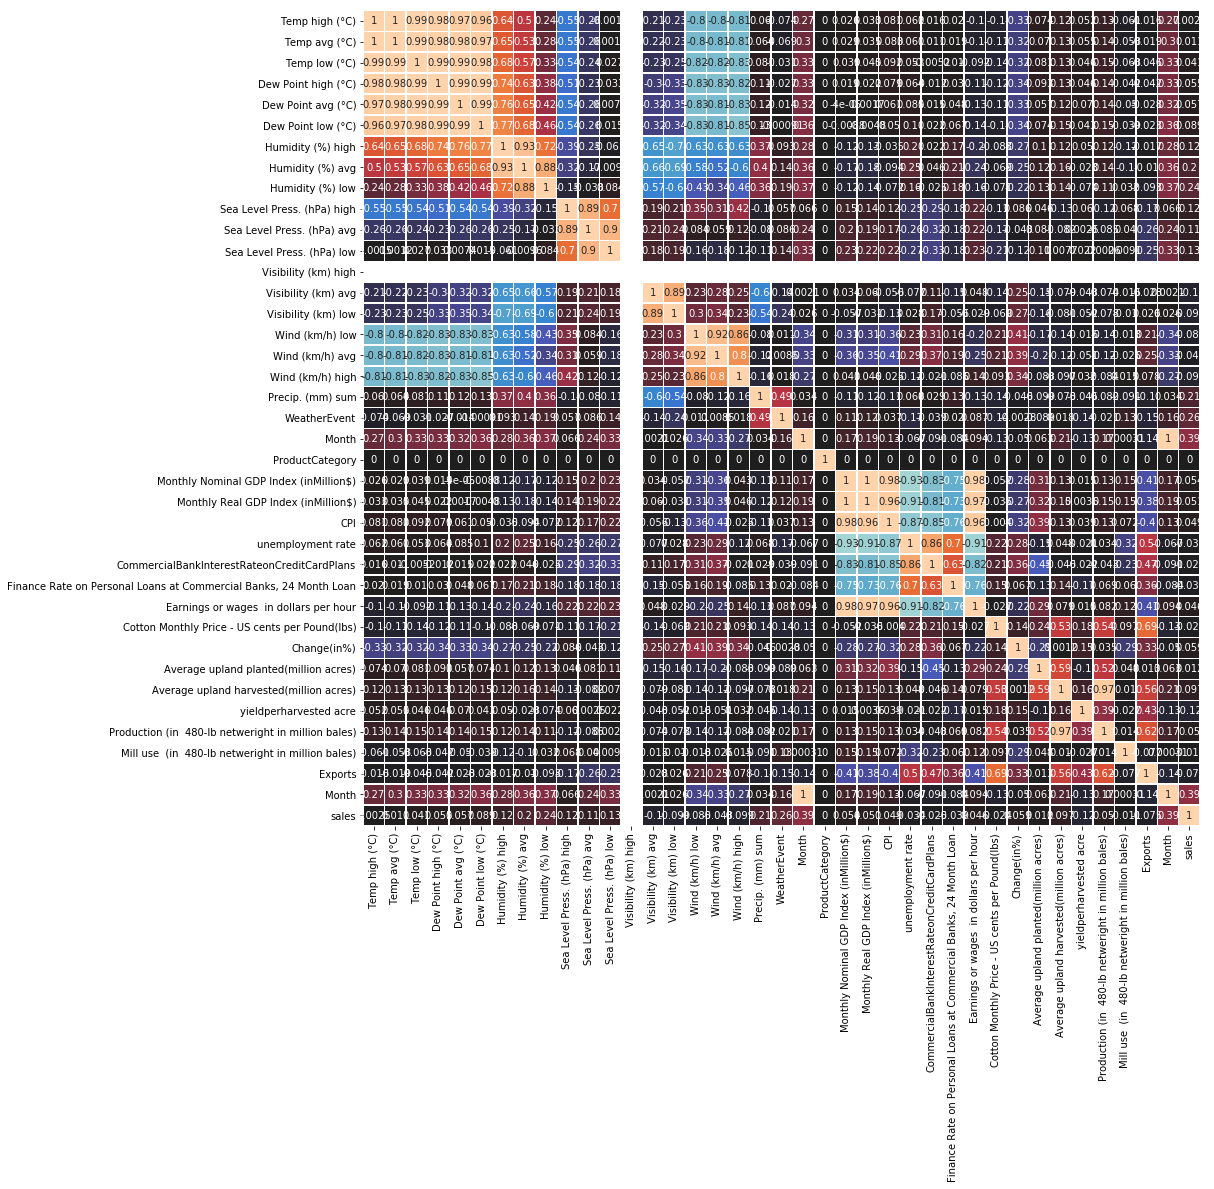

In [172]:
plt.figure(figsize=(15,15))
sns.heatmap(DATA.corr(),annot=True,linewidths=0.5,center=0, cbar=False)
plt.show()

In [159]:
train_new.corr()

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,...,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Month,Sales
Temp high (°C),1.000000,0.996312,0.987659,0.979141,0.974726,0.960292,0.638161,0.504724,0.241757,-0.545948,...,-0.103052,-0.332437,0.073960,0.119252,0.051621,0.134387,-0.060761,-0.016311,0.272720,-0.022736
Temp avg (°C),0.996312,1.000000,0.994615,0.983483,0.982012,0.970697,0.652109,0.527691,0.275315,-0.552165,...,-0.108807,-0.315487,0.070226,0.126309,0.054652,0.142181,-0.057676,-0.018519,0.299154,-0.022250
Temp low (°C),0.987659,0.994615,1.000000,0.987465,0.987817,0.982123,0.676808,0.568056,0.328192,-0.541424,...,-0.136202,-0.321316,0.080773,0.133078,0.045758,0.146235,-0.062555,-0.046214,0.333560,-0.017080
Dew Point high (°C),0.979141,0.983483,0.987465,1.000000,0.993943,0.985888,0.736899,0.627646,0.384082,-0.509764,...,-0.123793,-0.336048,0.092789,0.129076,0.045818,0.139650,-0.041511,-0.041610,0.331543,-0.016927
Dew Point avg (°C),0.974726,0.982012,0.987817,0.993943,1.000000,0.992722,0.755321,0.653784,0.417316,-0.542890,...,-0.112695,-0.330141,0.057497,0.121917,0.070313,0.139952,-0.049871,-0.028327,0.321951,-0.024721
Dew Point low (°C),0.960292,0.970697,0.982123,0.985888,0.992722,1.000000,0.765712,0.682981,0.463183,-0.543394,...,-0.099920,-0.342542,0.074131,0.145924,0.043258,0.154767,-0.039247,-0.022502,0.361835,-0.021658
Humidity (%) high,0.638161,0.652109,0.676808,0.736899,0.755321,0.765712,1.000000,0.934748,0.716004,-0.391326,...,-0.087968,-0.273750,0.102055,0.116240,0.049746,0.117273,-0.117048,-0.016540,0.280544,-0.021098
Humidity (%) avg,0.504724,0.527691,0.568056,0.627646,0.653784,0.682981,0.934748,1.000000,0.878432,-0.321746,...,-0.069420,-0.251874,0.123657,0.156045,-0.022634,0.139914,-0.102310,-0.010147,0.356146,-0.024284
Humidity (%) low,0.241757,0.275315,0.328192,0.384082,0.417316,0.463183,0.716004,0.878432,1.000000,-0.154674,...,-0.071437,-0.220161,0.132099,0.142105,-0.073689,0.113427,0.031614,-0.092922,0.366190,-0.014457
Sea Level Press. (hPa) high,-0.545948,-0.552165,-0.541424,-0.509764,-0.542890,-0.543394,-0.391326,-0.321746,-0.154674,1.000000,...,-0.110574,0.086083,0.045874,-0.128000,0.060048,-0.117945,0.068237,-0.174413,0.065876,0.065458


##pca

In [125]:
from sklearn.decomposition import PCA

In [131]:
pca = PCA(n_components=38)
super_pca = pca.fit_transform(X_Train1)
pca.explained_variance_ratio_.cumsum()

array([0.28931893, 0.48676094, 0.58038462, 0.66307323, 0.73910618,
       0.78075979, 0.81970545, 0.85113601, 0.87816304, 0.90394049,
       0.92130511, 0.93620146, 0.94883967, 0.96021027, 0.96997588,
       0.9758539 , 0.98086909, 0.9848029 , 0.98854035, 0.99093578,
       0.99304771, 0.99486902, 0.9963248 , 0.99734766, 0.99801789,
       0.99855511, 0.99897701, 0.99923872, 0.99948578, 0.9996626 ,
       0.99980375, 0.99987503, 0.99993355, 0.9999727 , 0.99999711,
       1.        , 1.        , 1.        ])

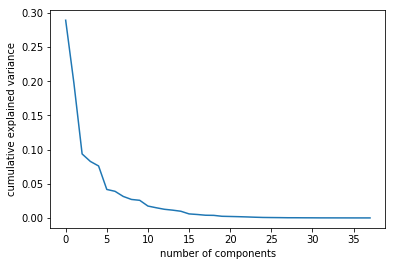

In [132]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [134]:
pca = PCA(n_components=8)
super_pca = pca.fit_transform(X_Train1)
pca.explained_variance_ratio_.cumsum()

array([0.28931893, 0.48676094, 0.58038462, 0.66307323, 0.73910618,
       0.78075979, 0.81970545, 0.85113601])